#### Overview
* 대표적인 Web Map Client는 `OpenLayers`와 `Leaflet`이 있는데, 이중 `Leaflet`을 파이썬에서 사용할 수 있도록 하는 라이브러리가 `folium`임

#### Import Libraries

In [26]:
import os
import folium
from folium import plugins as fp
import geopandas as gpd
import matplotlib.pyplot as plt

#### Basic Map

In [2]:
folium.Map(location=[37.5, 127], tiles='openstreetmap', zoom_start=10)

* The Other Tiles Provided by Folium:
  * https://github.com/python-visualization/folium/tree/main/folium/templates/tiles

In [3]:
folium.Map(location=[37.5, 127], tiles='cartodbpositron', zoom_start=15)

* The Other Tiles Provided by Etc(VWorld)

In [4]:
vworld_tile = 'http://xdworld.vworld.kr:8080/2d/Base/service/{z}/{x}/{y}.png'
folium.Map(location=[37.5, 127], tiles=vworld_tile, zoom_start=10, attr='VWorld')

#### Fetching Data with SHP file
* 16_에서 저장한 `mini_cf_gdf` 이용

In [7]:
CF_SHP_PATH = os.path.join(
    os.getcwd(),
    '89_data',
    'mini_cultural-festival.shp'
)

cf_gdf = gpd.read_file(CF_SHP_PATH, encoding='cp949')
cf_gdf.head()

,cf_name,org,geometry
0,춘천마임축제 봄시즌,강원특별자치도 춘천시,POINT (127.72785 37.87309)
1,춘천인형극제 코코바우 놀이터 자연아 놀러와,강원특별자치도 춘천시,POINT (127.72020 37.92102)
2,춘천마임축제 걷다 보는 마임,강원특별자치도 춘천시,POINT (127.72785 37.87309)
3,춘천마임축제 대학로 문화의 거리,강원특별자치도 춘천시,POINT (127.72785 37.87309)
4,제33회 춘천인형극제 국내 참가작 공모,강원특별자치도 춘천시,POINT (127.72020 37.92102)


#### Marker

In [10]:
# Create Map
base_map = folium.Map(location=[36,128], tiles='cartodbpositron', zoom_start=7)

# Add Marker to The Map
for idx, row in cf_gdf.iterrows():
    folium.Marker([row.geometry.y, row.geometry.x], popup=row.cf_name).add_to(base_map)

base_map

#### MarkerCluster

In [13]:
# Create Map
base_map = folium.Map(location=[36,128], tiles='cartodbpositron', zoom_start=7)

# Add MarkerCluster to The Map
mc = fp.MarkerCluster()
for idx, row in cf_gdf.iterrows():
    mc.add_child(folium.Marker([row.geometry.y, row.geometry.x], popup=row.cf_name))
    
base_map.add_child(mc)

base_map

#### Heatmaps

In [14]:
# Append Columns
cf_gdf['lat'] = cf_gdf.geometry.y
cf_gdf['lon'] = cf_gdf.geometry.x

# Create Map
base_map = folium.Map(location=[36,128], tiles='cartodbpositron', zoom_start=7)

# Add Heatmaps to The Map
fp.HeatMap(data=cf_gdf[['lat','lon']], radius=10).add_to(base_map)

base_map

#### Choropleth Maps
* Fetching Data with NGII

In [15]:
NGII_SHP_PATH = os.path.join(
    os.getcwd(),
    '89_data', 'shp', 'NGII_SIDO/Z_NGII_N3A_G0010000.shp'
)
sido_gdf = gpd.read_file(NGII_SHP_PATH, encoding='cp949')
sido_gdf.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,NaN,NaN,"MULTIPOLYGON (((932629.315 1508520.449, 932629..."
1,ARB0100000000002F,4800000000,경상남도,HJD004,NaN,NaN,"MULTIPOLYGON (((1049231.579 1666542.963, 10492..."
2,ARB0100000000003G,4700000000,경상북도,HJD004,NaN,NaN,"MULTIPOLYGON (((1163496.075 1906689.767, 11635..."
3,ARB0100000000004H,4600000000,전라남도,HJD004,NaN,NaN,"MULTIPOLYGON (((898759.456 1670482.743, 898760..."
4,ARB0100000000005I,4500000000,전라북도,HJD004,NaN,NaN,"MULTIPOLYGON (((953538.952 1794637.930, 953543..."


In [16]:
sido_gdf.crs

<Bound CRS: PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 200 ...>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- [east]: Easting (m)
- [north]: Northing (m)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from Korea 2000 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: Korea 2000 / Unified CS

In [20]:
sido_gdf['area'] = sido_gdf.geometry.area / 1000000
sido_gdf['area'].head()

0     1862.098047
1    10538.923224
2    19022.614443
3    12402.307866
4     8078.157375
Name: area, dtype: float64

In [21]:
sido_gdf_e4326 = sido_gdf.to_crs(epsg=4326)

In [22]:
sido_gdf_e4326.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry,area
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,NaN,NaN,"MULTIPOLYGON (((126.77414 33.56657, 126.77414 ...",1862.098047
1,ARB0100000000002F,4800000000,경상남도,HJD004,NaN,NaN,"MULTIPOLYGON (((128.03946 34.99262, 128.03946 ...",10538.923224
2,ARB0100000000003G,4700000000,경상북도,HJD004,NaN,NaN,"MULTIPOLYGON (((129.34094 37.14464, 129.34099 ...",19022.614443
3,ARB0100000000004H,4600000000,전라남도,HJD004,NaN,NaN,"MULTIPOLYGON (((126.39023 35.02427, 126.39024 ...",12402.307866
4,ARB0100000000005I,4500000000,전라북도,HJD004,NaN,NaN,"MULTIPOLYGON (((126.98353 36.14769, 126.98359 ...",8078.157375


* 아래 코드는 실행하지 말것
실행하면 ipynb파일 자체 크기가 160MB로 늘어나 Github등에 올릴 수 없음

In [ ]:
# base_map = folium.Map(location=[35.7,128], tiles='cartodbpositron', zoom_start=7)

# # choropleht는 더 이상 지원하지 않음: 아래 경고 참조
# my_scales = (sido_gdf_e4326['area'].quantile((0, .25,.5,.75,1))).tolist()
# base_map.choropleth(
#     geo_data=sido_gdf_e4326,
#     name='Choropleth',
#     data=sido_gdf_e4326,
#     columns=('BJCD', 'area'),
#     key_on='feature.properties.BJCD',
#     fill_color='YlGnBu',
#     threshold_scale=my_scales,
#     fill_opacity=.7,
#     line_opacity=.1,
#     legend_name='시도별 면적',
#     smooth_factor=1
# )

# base_map

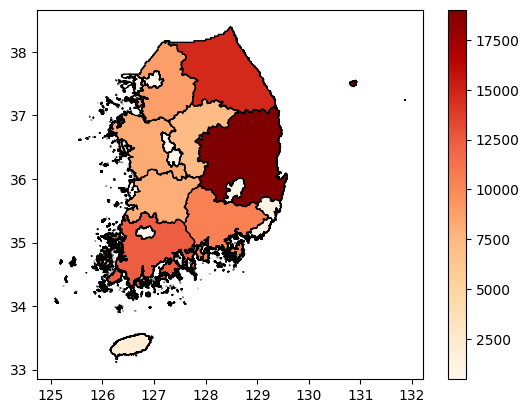

In [27]:
sido_gdf_e4326.plot(column='area', cmap='OrRd', edgecolor='k', legend=True)
plt.show()

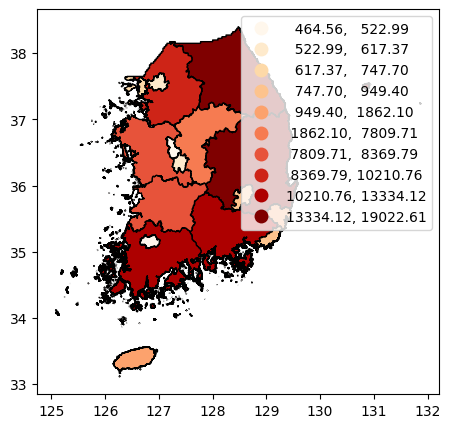

In [30]:
sido_gdf_e4326.plot(
    figsize=(12,5),
    column='area', 
    k=10, 
    scheme='quantiles',
    cmap='OrRd', 
    edgecolor='k', 
    legend=True
)
plt.show()

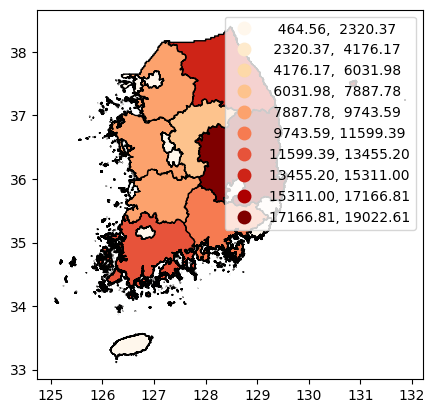

In [31]:
sido_gdf_e4326.plot(
    column='area', 
    k=10, 
    scheme='equal_interval',
    cmap='OrRd', 
    edgecolor='k', 
    legend=True
)
plt.show()

In [36]:
sido_gdf_e4326['count'] = gpd.sjoin(sido_gdf_e4326, cf_gdf, predicate='within').groupby('BJCD').size()

In [37]:
sido_gdf_e4326.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry,area,count
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,NaN,NaN,"MULTIPOLYGON (((126.77414 33.56657, 126.77414 ...",1862.098047,NaN
1,ARB0100000000002F,4800000000,경상남도,HJD004,NaN,NaN,"MULTIPOLYGON (((128.03946 34.99262, 128.03946 ...",10538.923224,NaN
2,ARB0100000000003G,4700000000,경상북도,HJD004,NaN,NaN,"MULTIPOLYGON (((129.34094 37.14464, 129.34099 ...",19022.614443,NaN
3,ARB0100000000004H,4600000000,전라남도,HJD004,NaN,NaN,"MULTIPOLYGON (((126.39023 35.02427, 126.39024 ...",12402.307866,NaN
4,ARB0100000000005I,4500000000,전라북도,HJD004,NaN,NaN,"MULTIPOLYGON (((126.98353 36.14769, 126.98359 ...",8078.157375,NaN


#### Bubble Maps

In [38]:
sido_gdf_e4326_dc = sido_gdf_e4326.copy(deep=True)

In [39]:
sido_gdf_e4326_dc['geometry'] = sido_gdf_e4326_dc.centroid
sido_gdf_e4326_dc.head()

C:\Users\freeman\AppData\Local\Temp\ipykernel_13168\1260157966.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  sido_gdf_e4326_dc['geometry'] = sido_gdf_e4326_dc.centroid


,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry,area,count
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,NaN,NaN,POINT (126.55437 33.38752),1862.098047,NaN
1,ARB0100000000002F,4800000000,경상남도,HJD004,NaN,NaN,POINT (128.26134 35.32324),10538.923224,NaN
2,ARB0100000000003G,4700000000,경상북도,HJD004,NaN,NaN,POINT (128.74880 36.34862),19022.614443,NaN
3,ARB0100000000004H,4600000000,전라남도,HJD004,NaN,NaN,POINT (126.90007 34.87395),12402.307866,NaN
4,ARB0100000000005I,4500000000,전라북도,HJD004,NaN,NaN,POINT (127.14180 35.71586),8078.157375,NaN


In [40]:
# Create Map
base_map = folium.Map(location=[36,128], tiles='cartodbpositron', zoom_start=7)

def color_producer(value):
    return 'forestgreen' if value <= 10 else 'darkred'

# Add Bubble Maps to The Map
for idx, row in sido_gdf_e4326_dc.iterrows():
    folium.Circle(
        location=[row.geometry.y, row.geometry.x],
        radius=row['area'] * 3,
        fill=True,
        fill_color = color_producer(row['area']/1000),
        color=color_producer(row['area']/1000),
        popup=f'{row["NAME"]} : {str(round(row["area"], 0))}'
    ).add_to(base_map)

base_map